**Importar librerias**

In [28]:
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

# Cargar csv

In [29]:
df = pd.read_csv('../Data/raw/weather_prediction_dataset.csv', header = 0)

### Inspecciono la cabecera

In [63]:
df.shape[0]

3654

###  El dataset tiene 165 columnas, pero son los mismos valores para ciudades distintas, porlo que quizas se pueda hacer una agrupación

In [64]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [65]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


### Target predecir las temperaturas de cada ciuidad y la categoria del tiempo que va a hacer

In [66]:
print(df.columns)

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [114]:
print(df.dtypes)

DATE                        int64
MONTH                       int64
BASEL_cloud_cover           int64
BASEL_humidity            float64
BASEL_pressure            float64
                           ...   
TOURS_global_radiation    float64
TOURS_precipitation       float64
TOURS_temp_mean           float64
TOURS_temp_min            float64
TOURS_temp_max            float64
Length: 165, dtype: object


In [68]:
df.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


In [69]:
df_ciudad = pd.read_csv("../Data/processed/df_ciudad_filtrada.csv")
df_ciudad.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6


In [84]:
df_julio = df_ciudad[df_ciudad['MONTH'] == 1]
df_julio.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,ESTACION
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,0
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,0
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,0
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,0
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,0


In [ ]:

def mes_a_estacion(mes):
    if mes in [12, 1, 2]:
        return "Invierno"
    elif mes in [3, 4, 5]:
        return "Primavera"
    elif mes in [6, 7, 8]:
        return "Verano"
    else:
        return "Otoño"

df_ciudad['ESTACION'] = df_ciudad['MONTH'].apply(mes_a_estacion)


In [102]:
from sklearn.preprocessing import LabelEncoder

# Codificar antes del split
df_ciudad['ESTACION'] = df_ciudad['MONTH'].apply(mes_a_estacion)
le = LabelEncoder()
df_ciudad['ESTACION'] = le.fit_transform(df_ciudad['ESTACION'])

X = df_ciudad.iloc[:, 3:11].values


y = df_ciudad['ESTACION'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=55)


In [103]:
# Mostrar los nombres de las columnas del DataFrame original
print(df_ciudad.columns[3:11])


Index(['BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean',
       'BASEL_temp_min', 'BASEL_temp_max'],
      dtype='object')


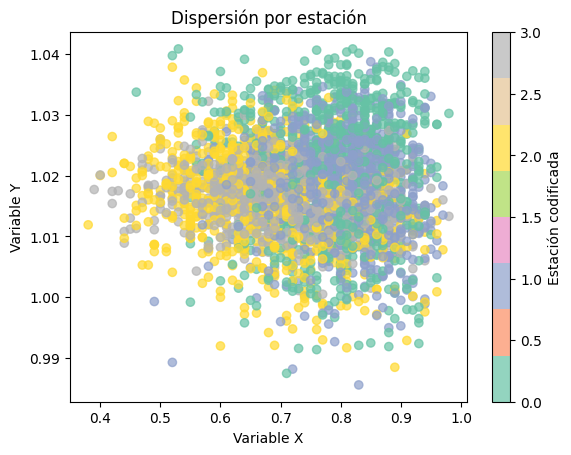

In [104]:
import matplotlib.pyplot as plt

# Convertir las estaciones a números (0–3)
colores = df_ciudad['ESTACION'].astype('category').cat.codes

plt.scatter(X[:, 0], X[:, 1], c=colores, cmap='Set2', alpha=0.7)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Dispersión por estación')
plt.colorbar(label='Estación codificada')
plt.show()


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Codificar la variable objetivo (estación)
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Otoño → 0, Invierno → 1, etc.

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Entrenar el modelo
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rnd_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7702


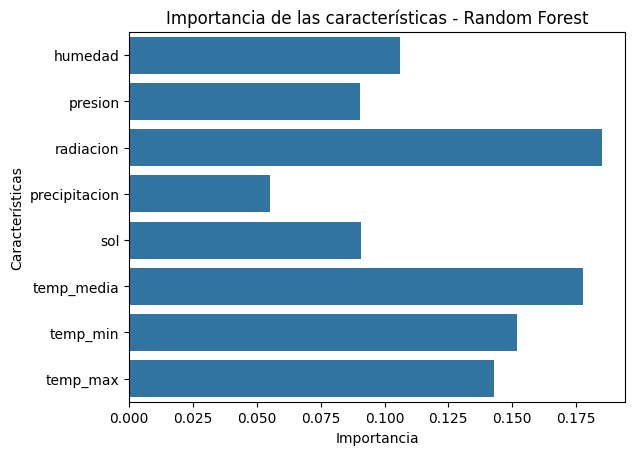

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = rnd_clf.feature_importances_
features = ['humedad', 'presion', 'radiacion', 'precipitacion', 'sol',
            'temp_media', 'temp_min', 'temp_max']


# Asegúrate de que la longitud coincida
sns.barplot(x=importances, y=features)
plt.title("Importancia de las características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()



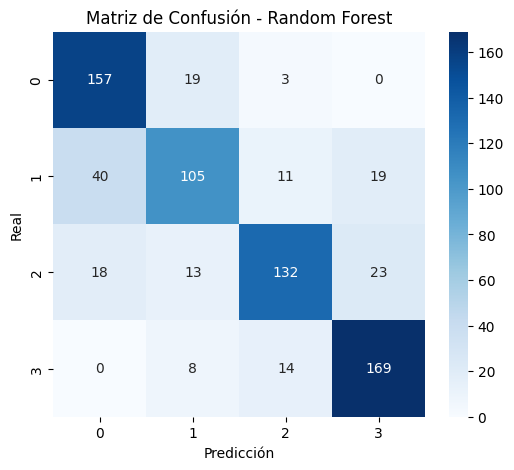

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_  # nombres de las estaciones

# Visualizar con seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


In [263]:
import numpy as np
import joblib

punto_oslo = np.array([[0.94, 1.0130, 0.04, 0.60, 0.0, 15.0, 18.6, 13.2]])
probas = rnd_clf.predict_proba(punto_oslo)
prediction = rnd_clf.predict(punto_oslo)
print(probas,prediction)



[[0.08 0.68 0.04 0.2 ]] [1]


In [257]:
joblib.dump(rnd_clf, "RandomForrest.pkl")

['RandomForrest.pkl']

In [233]:
def estacion_a_mes(estacion):
    if estacion == 0:
        return "invierno"   # Enero
    elif estacion == 1:
        return "Primavera"  # Abril
    elif estacion == 2:
        return "verano"  # Julio
    elif estacion == 3:
        return "Otoño" # Octubre



In [234]:
estacion2 = estacion_a_mes(estacion)
print(estacion2)

Otoño


In [48]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [213]:
punto_nuevo = [[3,1,0.89, 1.0286, 0.20, 0.03, 0.0, 14.9, 11.6, 3.9]]


In [ ]:
import json

with open("valor_k.json", "r") as f:
    data = json.load(f)

k = data["k"]
print("Valor de k cargado desde Streamlit:", k)


FileNotFoundError: [Errno 2] No such file or directory: 'valor_k.json'

In [50]:
import pandas as pd
X_df = pd.DataFrame(X)


In [54]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

k=5
# Codificar la variable objetivo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Evaluar el modelo
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo KNN (k={k}): {accuracy:.4f}")



Accuracy del modelo KNN (k=5): 0.8755


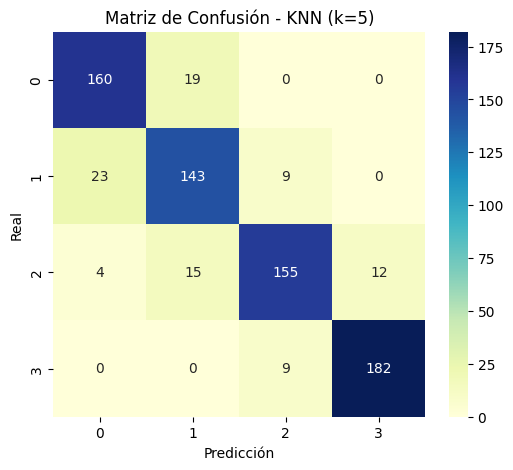

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title(f'Matriz de Confusión - KNN (k={k})')
plt.show()


In [224]:
# Ejemplo de punto nuevo (ajusta los valores según tu caso real)
punto_nuevo = [[75.0, 1013.2, 120.5, 0.0, 5.2, 15.3, 10.1, 20.4]]

# Predicción codificada
pred_num = knn.predict(punto_nuevo)[0]

# Decodificar a nombre de estación
pred_estacion = le.inverse_transform([pred_num])[0]
print("Estación predicha:", pred_estacion)


Estación predicha: 3


In [227]:
estacionk= estacion_a_mes(pred_estacion)
print(estacionk)

Otoño


In [ ]:
import joblib

joblib.dump(knn, "../Models/modelo_knn.pkl")
joblib.dump(le, "../Models/label_encoder.pkl")



['RandomForrest.pkl']